PROYECTO FINAL - DANIEL OLIVERA

1 - OBJETIVO:
* Utilizar datasets 

VARIABLES (PREDICTORES)

    * OAR   (Outline Aspect Ratio)--------->Relación de aspecto del contorno de la cara
    * LBAR  (Left eyeBrow Aspect Ratio)---->Relación de aspecto de la ceja izquierda
    * RBAR  (Right eyeBrow Aspect Ratio)--->Relación de aspecto de la ceja derecha
    * NUAR  (Nose Up Aspect Ratio)--------->Relación de aspecto de la parte superior de la nariz
    * NDAR  (Nose Down Aspect Ratio)------->Relación de aspecto de la parte baja de la nariz
    * LEAR  (Left Eye Aspect Ratio)-------->Relación de aspecto del ojo izquierdo
    * REAR  (Right Eye Aspect Ratio)------->Relación de aspecto del ojo derecho
    * OLAR  (Out Lips Aspect Ratio)-------->Relación de aspecto del contorno externo de los labios
    * ILAR  (In Lips Aspect Ratio)--------->Relación de aspecto del contorno interno de los labios

In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
#cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
#cmap_bold = ["darkorange", "c", "darkblue"]
#%matplotlib inline

2 - Análisis exploratorio de datos - eda

In [2]:
df_neutral = pd.read_csv('D:\VSCnotebook\TPfinal\\neutral.csv')
df_sorpresa = pd.read_csv('D:\VSCnotebook\TPfinal\\sorpresa.csv')
df_enojo = pd.read_csv('D:\VSCnotebook\TPfinal\\enojo.csv')
main_df = [df_neutral, df_sorpresa, df_enojo]
main_df = pd.concat(main_df)
main_df = main_df.sample(frac=1, random_state=15193).reset_index()
main_df = main_df.drop('index', axis=1)
main_df.head()

,OAR,LBAR,RBAR,NUAR,NDAR,LEAR,REAR,OLAR,ILAR,TAG
0,0.1329,0.3675,0.3792,1.3777,1.8799,0.2778,0.2583,0.1329,0.0699,2
1,0.1460,0.5417,0.5762,1.5752,1.9258,0.3293,0.3462,0.1460,0.2424,1
2,0.1443,0.5246,0.5429,1.4704,1.9230,0.2622,0.2827,0.1443,0.1731,1
3,0.1317,0.3633,0.3799,1.3020,1.9730,0.2374,0.2630,0.1317,0.0202,2
4,0.1282,0.3781,0.3855,1.3557,1.9465,0.2294,0.2358,0.1282,0.0391,2


In [3]:
main_df.shape

(32948, 10)

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32948 entries, 0 to 32947
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OAR     32948 non-null  float64
 1   LBAR    32948 non-null  float64
 2   RBAR    32948 non-null  float64
 3   NUAR    32948 non-null  float64
 4   NDAR    32948 non-null  float64
 5   LEAR    32948 non-null  float64
 6   REAR    32948 non-null  float64
 7   OLAR    32948 non-null  float64
 8   ILAR    32948 non-null  float64
 9   TAG     32948 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.5 MB


In [5]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OAR,32948.0,0.133913,0.006535,0.1219,0.1284,0.1312,0.1407,0.1558
LBAR,32948.0,0.439732,0.084500,0.2663,0.3682,0.4146,0.5260,0.6777
RBAR,32948.0,0.456440,0.084611,0.2660,0.3855,0.4344,0.5468,0.7053
NUAR,32948.0,1.454141,0.105841,1.1228,1.3657,1.4513,1.5339,1.7878
NDAR,32948.0,1.915354,0.065350,1.7179,1.8619,1.9083,1.9533,2.1829
LEAR,32948.0,0.272130,0.038997,0.0640,0.2499,0.2754,0.3001,0.4041
REAR,32948.0,0.285153,0.042245,0.0557,0.2578,0.2891,0.3159,0.4213
OLAR,32948.0,0.133913,0.006535,0.1219,0.1284,0.1312,0.1407,0.1558
ILAR,32948.0,0.118573,0.123963,0.0000,0.0241,0.0423,0.2371,0.4613
TAG,32948.0,1.006283,0.806266,0.0000,0.0000,1.0000,2.0000,2.0000


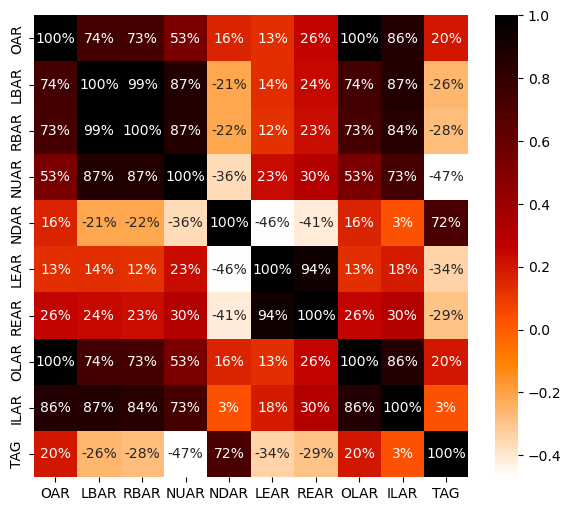

In [6]:
correlacion = main_df.corr()
main_df.corr()
plt.figure(figsize=(7,6))
axC = sns.heatmap(correlacion,annot=True,fmt='.0%',cmap="gist_heat_r")

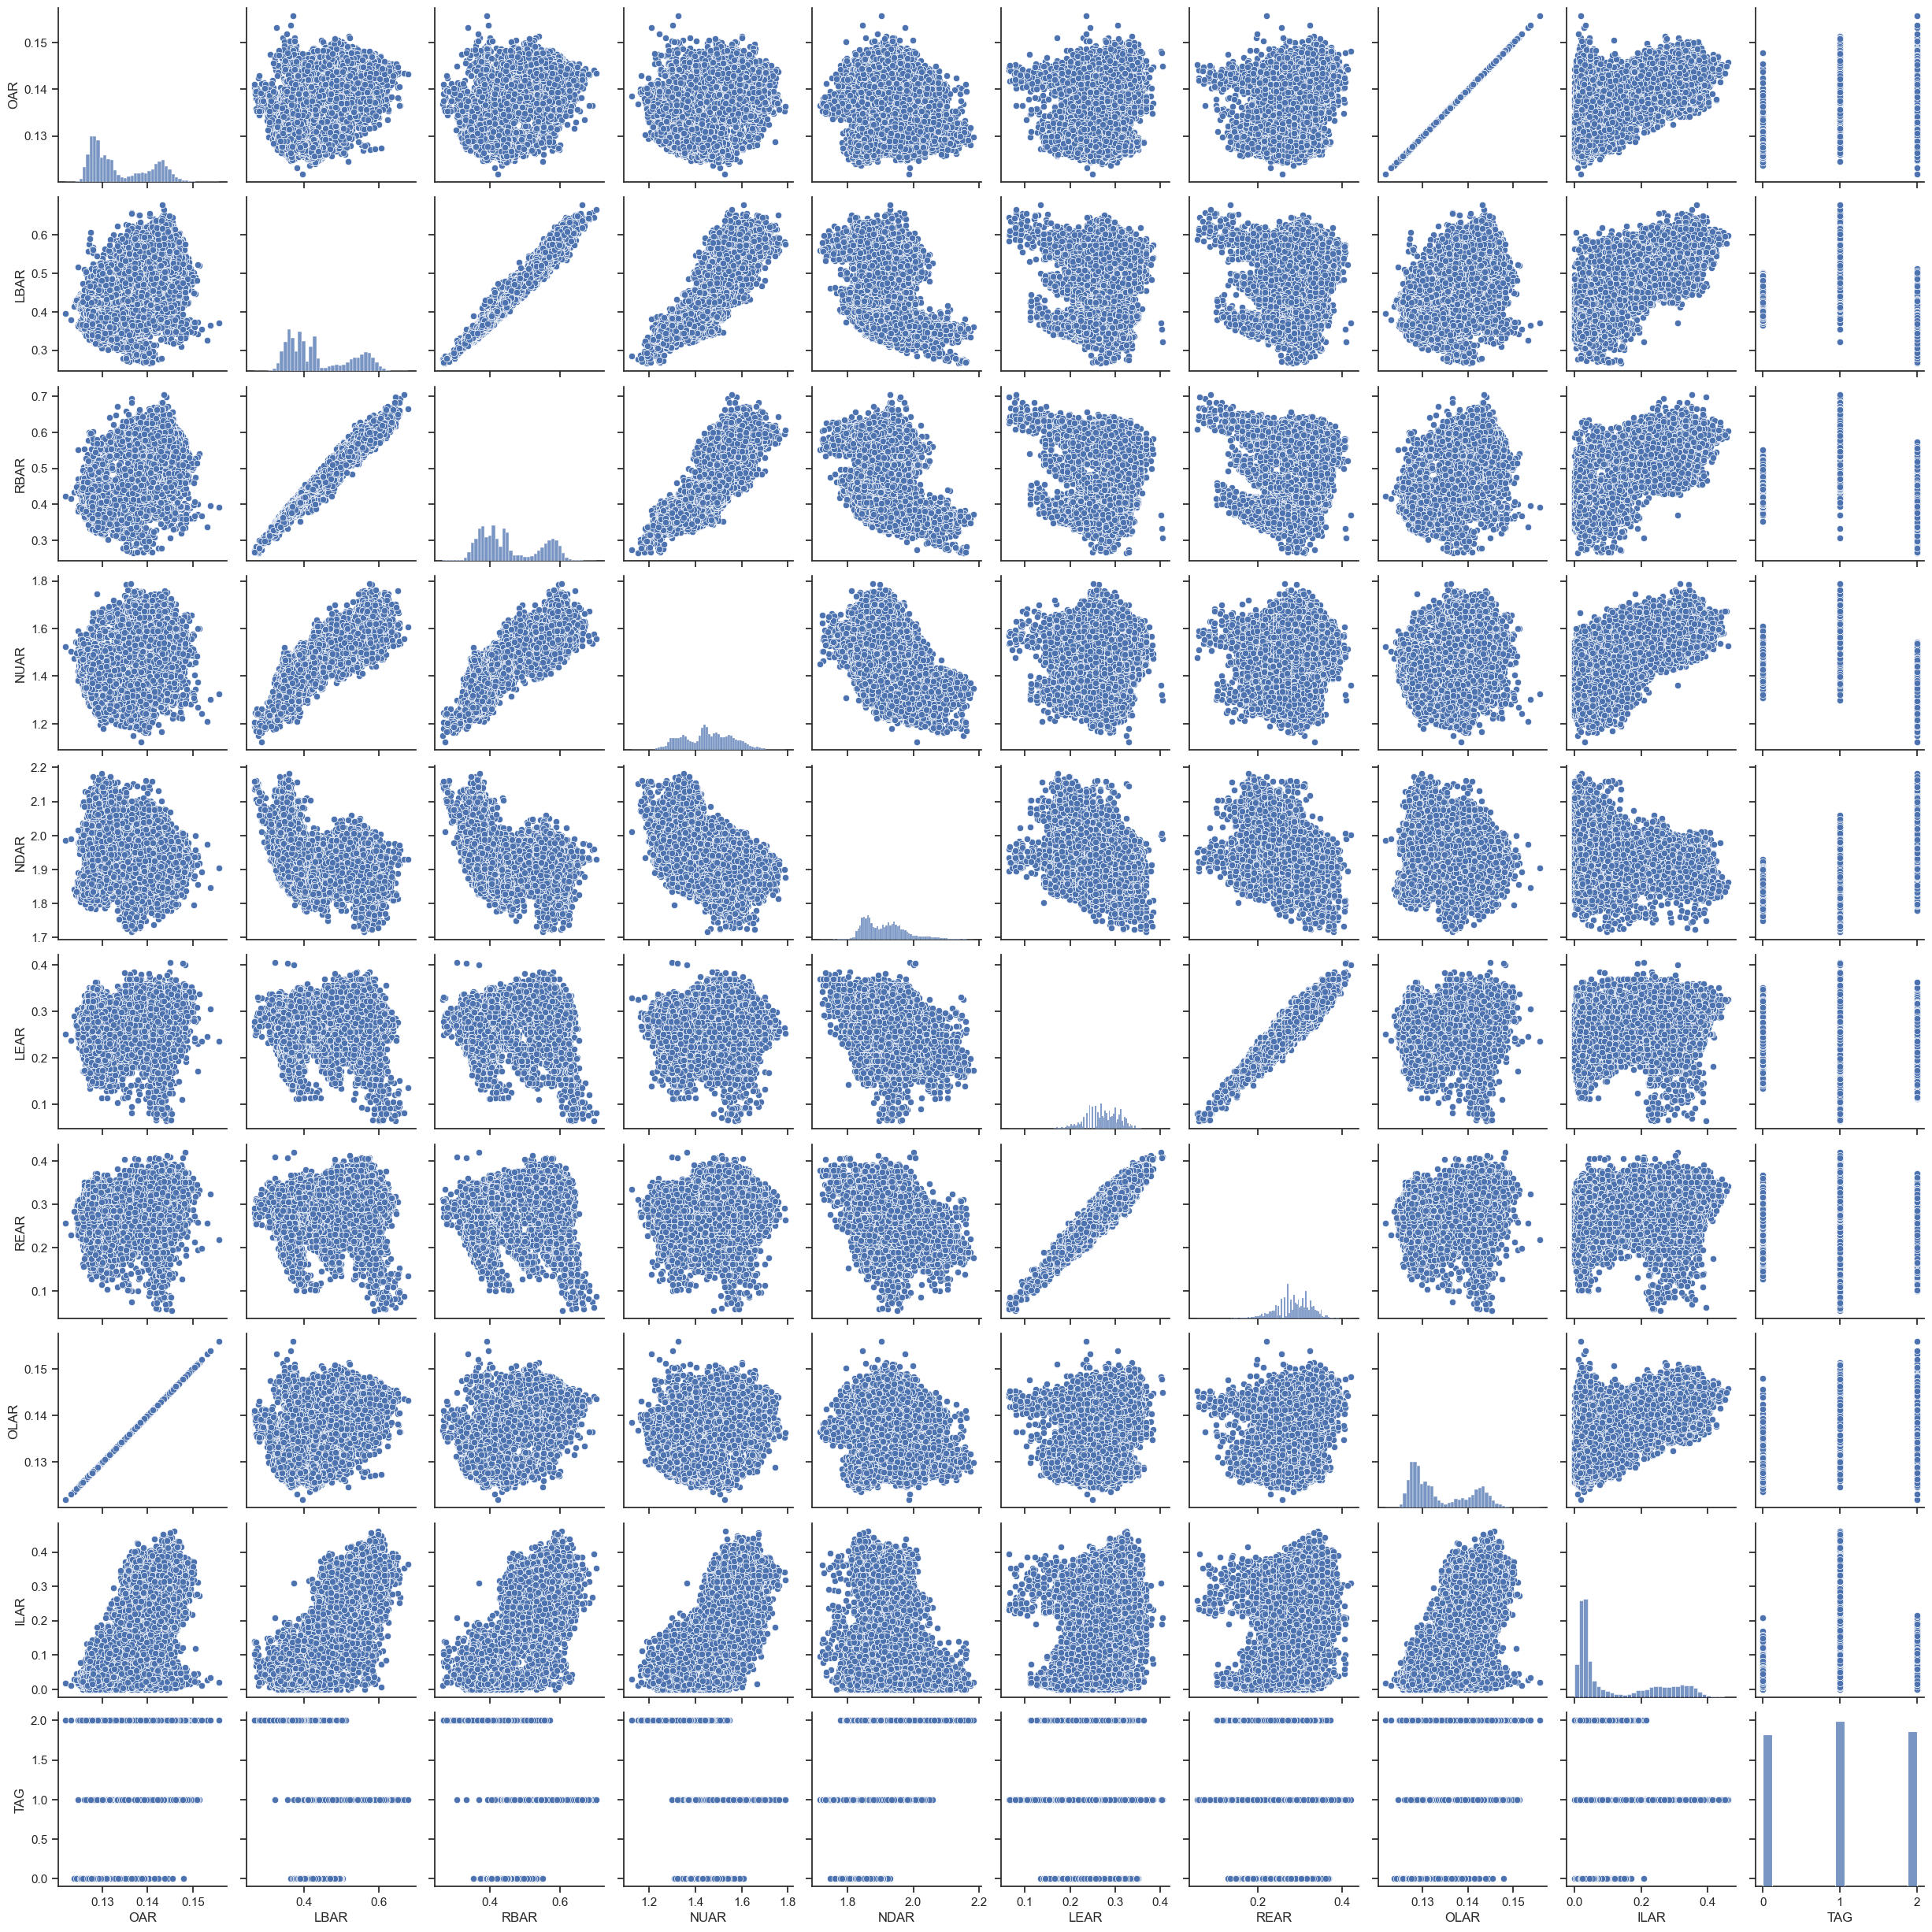

In [7]:
sns.set(style = "ticks")
sns.pairplot(main_df)

*3 - MODELOS

In [8]:
X = main_df.iloc[:,  :-1].values
y = main_df.iloc[:, -1].values
X

array([[0.1329, 0.3675, 0.3792, ..., 0.2583, 0.1329, 0.0699],
       [0.146 , 0.5417, 0.5762, ..., 0.3462, 0.146 , 0.2424],
       [0.1443, 0.5246, 0.5429, ..., 0.2827, 0.1443, 0.1731],
       ...,
       [0.1384, 0.3651, 0.3777, ..., 0.2305, 0.1384, 0.084 ],
       [0.1422, 0.602 , 0.5918, ..., 0.2924, 0.1422, 0.3791],
       [0.1277, 0.3682, 0.3934, ..., 0.2718, 0.1277, 0.0159]])

In [9]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_y = LabelEncoder()
y = Labelencoder_y.fit_transform(y)
y

array([2, 1, 1, ..., 2, 1, 2], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15193)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [12]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [2 2]
 [0 2]
 [0 0]]


In [13]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2172    0    2]
 [   4 2296    0]
 [   5    0 2111]]


0.9983308042488619

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5)
acc_mean = accuracies.mean()
acc_std = accuracies.std()
print(acc_mean, acc_std)

0.9974201970929778 0.0008532378122927493


In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_score(y_test, y_pred)

[[2142   20   12]
 [   2 2294    4]
 [  22    6 2088]]


0.9899848254931715

In [16]:
y_pred_proba_nb = nb.predict_proba(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)

In [17]:
knn_roc_auc = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')
knn_roc_auc

0.9994264376429159

In [19]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba_knn)

ValueError: multiclass format is not supported

In [18]:
nb_roc_auc = roc_auc_score(y_test, y_pred_proba_nb, multi_class='ovr')
nb_roc_auc

0.9984951487218293

In [ ]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)